In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
df_demo = pd.read_csv('CLEAN_demo.csv')

In [4]:
df_static = pd.read_csv('CLEAN_static.csv')

In [5]:
df = pd.read_csv('CLEAN_GVA.csv')

In [6]:
df

,incident_id,age,type,gender,status,gun_stolen,gun_type,date,state,city,number_guns,total_killed,total_injured,year
0,92114,NaN,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Lexington,NaN,0,1,2014
1,92117,22.0,Victim,Male,Injured,Unknown,Unknown,2014-01-01,Kentucky,Cynthiana,1.0,0,1,2014
2,92117,NaN,Subject-Suspect,Male,"Unharmed, Arrested",NaN,NaN,2014-01-01,Kentucky,Cynthiana,1.0,0,1,2014
3,92119,NaN,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Louisville,NaN,0,1,2014
4,92122,NaN,Victim,NaN,Unharmed,NaN,NaN,2014-01-01,Virginia,Falls Church,NaN,0,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449782,1083457,NaN,Victim,Male,Injured,Unknown,Unknown,2018-03-22,District of Columbia,Washington,1.0,0,1,2018
449783,1083457,NaN,Subject-Suspect,Male,Unharmed,NaN,NaN,2018-03-22,District of Columbia,Washington,1.0,0,1,2018
449784,1083466,NaN,Subject-Suspect,NaN,NaN,Unknown,Unknown,2018-03-29,Ohio,Wickliffe,1.0,0,0,2018
449785,1083472,23.0,Subject-Suspect,Male,"Unharmed, Arrested",Unknown,9mm,2018-03-31,Delaware,Townsend,2.0,0,0,2018


In [7]:
df_demo

,incident_id,age,age_group,type,gender,status
0,461105,20.0,Adult 18+,Victim,Male,Arrested
1,460726,20.0,Adult 18+,Victim,Male,Killed
2,478855,25.0,Adult 18+,Subject-Suspect,Male,"Injured, Unharmed, Arrested"
3,478925,29.0,Adult 18+,Victim,Female,Killed
4,478959,18.0,Adult 18+,Victim,Female,Injured
...,...,...,...,...,...,...
385471,575663,NaN,Adult 18+,Subject-Suspect,Male,"Unharmed, Arrested"
385472,577157,19.0,Adult 18+,Victim,Male,Injured
385473,577157,19.0,Adult 18+,Victim,Male,Injured
385474,577157,30.0,Adult 18+,Victim,Male,Injured


In [8]:
df_victim=df_demo.copy()
df_victim

,incident_id,age,age_group,type,gender,status
0,461105,20.0,Adult 18+,Victim,Male,Arrested
1,460726,20.0,Adult 18+,Victim,Male,Killed
2,478855,25.0,Adult 18+,Subject-Suspect,Male,"Injured, Unharmed, Arrested"
3,478925,29.0,Adult 18+,Victim,Female,Killed
4,478959,18.0,Adult 18+,Victim,Female,Injured
...,...,...,...,...,...,...
385471,575663,NaN,Adult 18+,Subject-Suspect,Male,"Unharmed, Arrested"
385472,577157,19.0,Adult 18+,Victim,Male,Injured
385473,577157,19.0,Adult 18+,Victim,Male,Injured
385474,577157,30.0,Adult 18+,Victim,Male,Injured


In [9]:
df_victim = df_victim[df_victim.type != "Subject-Suspect"]
df_victim

,incident_id,age,age_group,type,gender,status
0,461105,20.0,Adult 18+,Victim,Male,Arrested
1,460726,20.0,Adult 18+,Victim,Male,Killed
3,478925,29.0,Adult 18+,Victim,Female,Killed
4,478959,18.0,Adult 18+,Victim,Female,Injured
5,478948,23.0,Adult 18+,Victim,Female,Killed
...,...,...,...,...,...,...
385470,577157,37.0,Adult 18+,Victim,Male,Injured
385472,577157,19.0,Adult 18+,Victim,Male,Injured
385473,577157,19.0,Adult 18+,Victim,Male,Injured
385474,577157,30.0,Adult 18+,Victim,Male,Injured


In [10]:
df_victim["type"].unique()

array(['Victim'], dtype=object)

In [11]:
df_victim["age"].unique()

array([ 20.,  29.,  18.,  23.,  51.,  nan,  15.,  19.,  28.,  78.,  34.,
        24.,  22.,  39.,  35.,  50.,  33.,  16.,  68.,  21.,  62.,   2.,
        64.,  17.,  36.,  31.,  10.,  41.,  47.,  60.,  14.,  72.,  55.,
        13.,  12.,  43.,  40.,  70.,  25.,  27.,  42.,   8.,  45.,  79.,
        30.,  26.,  53.,  11.,  32.,  59.,   3.,  67.,  66.,  61.,  85.,
         6.,  52.,  46.,  88.,  49.,  73.,  48.,  37.,   9.,  71.,  38.,
        58.,   5.,  44.,  90.,  57.,  69.,  56.,  63.,   7.,   4.,  54.,
        65.,  74.,  77.,  86.,  80.,  84.,  76.,  96.,  81.,   1.,  75.,
        83.,  82.,  92.,  87.,   0., 101.,  89.,  97.,  91.,  94.,  95.,
        93.,  99., 100., 209.])

In [12]:
df_victim["age"].describe()

count    123519.000000
mean         29.779783
std          13.727560
min           0.000000
25%          20.000000
50%          26.000000
75%          36.000000
max         209.000000
Name: age, dtype: float64

In [13]:
df_victim.groupby("gender").count()

,incident_id,age,age_group,type,status
gender,,,,,
Female,30886,22139,29611,30886,30744
Male,144545,100127,137014,144545,143661
"Male, female",1,1,1,1,1


In [14]:
df_victim[["gender","age"]].groupby("gender").mean()

,age
gender,
Female,31.867880
Male,29.410658
"Male, female",32.000000


In [17]:
df_sus=df_demo.copy()
df_sus= df_sus[df_sus.type != "Victim"]
df_sus

,incident_id,age,age_group,type,gender,status
2,478855,25.0,Adult 18+,Subject-Suspect,Male,"Injured, Unharmed, Arrested"
24,480401,NaN,Adult 18+,Subject-Suspect,Male,"Unharmed, Arrested"
34,482771,19.0,Adult 18+,Subject-Suspect,Male,"Unharmed, Arrested"
116,490048,28.0,Adult 18+,Subject-Suspect,Male,"Unharmed, Arrested"
121,893251,22.0,Adult 18+,Subject-Suspect,Male,Injured
...,...,...,...,...,...,...
385463,575663,28.0,Adult 18+,Subject-Suspect,Male,"Unharmed, Arrested"
385465,575663,NaN,Adult 18+,Subject-Suspect,Male,"Unharmed, Arrested"
385467,575663,NaN,Adult 18+,Subject-Suspect,Female,"Unharmed, Arrested"
385469,575663,NaN,Adult 18+,Subject-Suspect,Male,"Unharmed, Arrested"


In [18]:
df_sus[["gender","age"]].groupby("gender").mean()

,age
gender,
Female,31.249595
Male,29.009994


In [19]:
df_demo.groupby(["status"])[["status"]].count()

,status
status,
Arrested,10169
Injured,113296
"Injured, Arrested",3467
"Injured, Unharmed",31
"Injured, Unharmed, Arrested",22
Killed,59385
"Killed, Arrested",51
"Killed, Injured",10
"Killed, Unharmed",21


In [20]:
df_demo["status"]

0                            Arrested
1                              Killed
2         Injured, Unharmed, Arrested
3                              Killed
4                             Injured
                     ...             
385471             Unharmed, Arrested
385472                        Injured
385473                        Injured
385474                        Injured
385475                        Injured
Name: status, Length: 385476, dtype: object

In [21]:
split_status_more=df_demo["status"].str.split(pat= ",", expand=True) 
split_status_more

,0,1,2
0,Arrested,None,None
1,Killed,None,None
2,Injured,Unharmed,Arrested
3,Killed,None,None
4,Injured,None,None
...,...,...,...
385471,Unharmed,Arrested,None
385472,Injured,None,None
385473,Injured,None,None
385474,Injured,None,None


In [22]:
di = {"Unharmed, Arrested": "Unharmed",
      "Injured, Arrested": "Injured",
      "Injured, Unharmed": "Injured",
      "Injured, Unharmed, Arrested":"Injured",
      "Killed, Arrested": "Killed",
      "Killed, Unharmed": "Killed",
      "Killed, Injured":"Killed",
      "Killed, Unharmed, Arrested":"Killed"}

In [23]:
df_demo=df_demo.replace({"status": di})
df_demo


,incident_id,age,age_group,type,gender,status
0,461105,20.0,Adult 18+,Victim,Male,Arrested
1,460726,20.0,Adult 18+,Victim,Male,Killed
2,478855,25.0,Adult 18+,Subject-Suspect,Male,Injured
3,478925,29.0,Adult 18+,Victim,Female,Killed
4,478959,18.0,Adult 18+,Victim,Female,Injured
...,...,...,...,...,...,...
385471,575663,NaN,Adult 18+,Subject-Suspect,Male,Unharmed
385472,577157,19.0,Adult 18+,Victim,Male,Injured
385473,577157,19.0,Adult 18+,Victim,Male,Injured
385474,577157,30.0,Adult 18+,Victim,Male,Injured


In [29]:
df_static

,incident_id,date,state,city,number_guns,total_killed,total_injured,gun_stolen,gun_type
0,461105,2013-01-01,Pennsylvania,Mckeesport,NaN,0,4,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,NaN,1,3,NaN,NaN
2,478855,2013-01-01,Ohio,Lorain,2.0,1,3,Unknown,Unknown
3,478925,2013-01-05,Colorado,Aurora,NaN,4,0,NaN,NaN
4,478959,2013-01-07,North Carolina,Greensboro,2.0,2,2,Unknown,Handgun
...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,1.0,0,0,Unknown,Unknown
239673,1083139,2018-03-31,Louisiana,Natchitoches,1.0,1,0,Unknown,Unknown
239674,1083151,2018-03-31,Louisiana,Gretna,1.0,0,1,Unknown,Unknown
239675,1082514,2018-03-31,Texas,Houston,1.0,1,0,Unknown,Unknown


In [48]:
df_static['date']=pd.to_datetime(df_static['date'])
year_col=df_static["date"].dt.to_period(freq ="Y")
df_static['month'] = pd.DatetimeIndex(df_static['date']).month

In [36]:
df_static["year"]=year_col

In [37]:
new_demo=df_demo.set_index("incident_id")
new_static=df_static.set_index("incident_id")

In [38]:
joined=new_demo.join(new_static, how='outer')
joined=joined.reset_index()
joined

,incident_id,age,age_group,type,gender,status,date,state,city,number_guns,total_killed,total_injured,gun_stolen,gun_type,year
0,92114,NaN,Adult 18+,Victim,Male,Injured,2014-01-01,Kentucky,Lexington,NaN,0,1,NaN,NaN,2014
1,92117,22.0,Adult 18+,Victim,Male,Injured,2014-01-01,Kentucky,Cynthiana,1.0,0,1,Unknown,Unknown,2014
2,92117,NaN,Adult 18+,Subject-Suspect,Male,Unharmed,2014-01-01,Kentucky,Cynthiana,1.0,0,1,Unknown,Unknown,2014
3,92119,NaN,Adult 18+,Victim,Male,Injured,2014-01-01,Kentucky,Louisville,NaN,0,1,NaN,NaN,2014
4,92122,NaN,NaN,Victim,NaN,Unharmed,2014-01-01,Virginia,Falls Church,NaN,0,0,NaN,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413658,1083457,NaN,NaN,Victim,Male,Injured,2018-03-22,District of Columbia,Washington,1.0,0,1,Unknown,Unknown,2018
413659,1083457,NaN,NaN,Subject-Suspect,Male,Unharmed,2018-03-22,District of Columbia,Washington,1.0,0,1,Unknown,Unknown,2018
413660,1083466,NaN,NaN,Subject-Suspect,NaN,NaN,2018-03-29,Ohio,Wickliffe,1.0,0,0,Unknown,Unknown,2018
413661,1083472,23.0,Adult 18+,Subject-Suspect,Male,Unharmed,2018-03-31,Delaware,Townsend,2.0,0,0,Unknown,9mm,2018


In [39]:
year_gender_info=joined.groupby(['year','gender', 'status'])['incident_id'].count()
year_gender_info

year  gender        status  
2013  Female        Injured       199
                    Killed         79
                    Unharmed        4
      Male          Arrested        8
                    Injured       586
                    Killed        230
                    Unharmed      152
2014  Female        Arrested       13
                    Injured      2897
                    Killed       1687
                    Unharmed     4979
      Male          Arrested      145
                    Injured     16712
                    Killed       9579
                    Unharmed    38246
      Male, female  Injured         1
2015  Female        Arrested      136
                    Injured      3509
                    Killed       1944
                    Unharmed     4176
      Male          Arrested     1746
                    Injured     21019
                    Killed      11310
                    Unharmed    34119
2016  Female        Arrested      211
                    I

In [40]:
df_ygi=year_gender_info.to_frame()
df_ygi
#ygi_clean = df_ygi[df_ygi.status != "Arrested"]
#ygi_clean

incident_id
year gender       status               
2013 Female       Injured           199
                  Killed             79
                  Unharmed            4
     Male         Arrested            8
                  Injured           586
                  Killed            230
                  Unharmed          152
2014 Female       Arrested           13
                  Injured          2897
                  Killed           1687
                  Unharmed         4979
     Male         Arrested          145
                  Injured         16712
                  Killed           9579
                  Unharmed        38246
     Male, female Injured             1
2015 Female       Arrested          136
                  Injured          3509
                  Killed           1944
                  Unharmed         4176
     Male         Arrested         1746
                  Injured         21019
                  Killed          11310
                  Unharmed        34119
2016 Female       Arrested          211
                  Injured          3977
                  Killed           2215
                  Unharmed         4070
     Male         Arrested         2050
                  Injured         23565
                  Killed          12597
                  Unharmed        36769
2017 Female       Arrested          357
                  Injured          4120
                  Killed           2307
                  Unharmed         2906
     Male         Arrested         3591
                  Injured         23423
                  Killed          12913
                  Unharmed        34241
2018 Female       Arrested           56
                  Injured           845
                  Killed            591
                  Unharmed          728
     Male         Arrested          567
                  Injured          4652
                  Killed           2867
                  Unharmed         7980

In [42]:
stacked_df = pd.DataFrame(
    dict(
        year=[2013, 2013, 2013, 2013, 2013, 2013,
              2014, 2014, 2014, 2014, 2014, 2014,
              2015, 2015, 2015, 2015, 2015, 2015,
              2016, 2016, 2016, 2016, 2016, 2016,
              2017, 2017, 2017, 2017, 2017, 2017,
              2018, 2018, 2018, 2018, 2018, 2018],
        gender=["female", "female", "female", "male", "male", "male"] * 6,
        status=["Injured","Killed","Unharmed"] * 12,
        cnt=[199,79, 4, 586,230, 152,2897,1687,4979,16712,9579,38246,3509,
             1944,4176,21019,11310,34119,3977,2215,4070,23565,12597,36769,
             120,2307,2906,23423,12913,34241,845,591,728,4652,2867,7980],
    )
)

In [43]:
stacked_df

,year,gender,status,cnt
0,2013,female,Injured,199
1,2013,female,Killed,79
2,2013,female,Unharmed,4
3,2013,male,Injured,586
4,2013,male,Killed,230
5,2013,male,Unharmed,152
6,2014,female,Injured,2897
7,2014,female,Killed,1687
8,2014,female,Unharmed,4979
9,2014,male,Injured,16712


In [45]:
import plotly.graph_objects as go

fig = go.Figure()

fig.update_layout(
    template="simple_white",
    xaxis=dict(title_text="Year"),
    yaxis=dict(title_text="Count"),
    barmode="stack",
    autosize=False,
    width=1000,
    height=800,
    title="Status of Person by Year")
    

colors = ["#2A66DE", "#FFC32B"]

for r, c in zip(stacked_df.gender.unique(), colors):
    plot_df = stacked_df[stacked_df.gender == r]
    fig.add_trace(
        go.Bar(x=[plot_df.year, plot_df.status], y=plot_df.cnt, name=r, marker_color=c),
    )

fig


In [46]:
gender_info=df_demo.groupby(['gender', 'status'])['incident_id'].count()
gender_info

gender        status  
Female        Arrested       773
              Injured      15547
              Killed        8823
              Unharmed     16863
Male          Arrested      8107
              Injured      89957
              Killed       49496
              Unharmed    151507
Male, female  Injured          1
Name: incident_id, dtype: int64

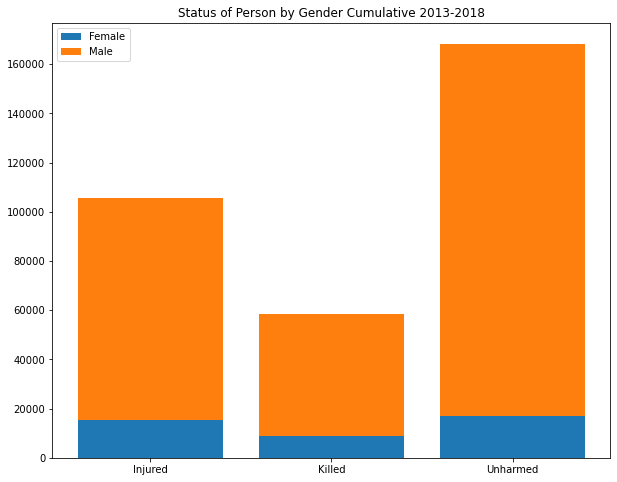

In [47]:
x = ['Injured', 'Killed', 'Unharmed']
y1 = [15547, 8823, 16863]
y2 = [89957, 49496, 151507]
  
fig, ax=plt.subplots(1,figsize=(10,8))
plt.bar(x, y1)
plt.bar(x, y2, bottom=y1)
plt.legend(["Female", "Male"])
plt.title('Status of Person by Gender Cumulative 2013-2018')

plt.show()

In [49]:
df_demo[["age","gender"]].groupby("gender").mean()

,age
gender,
Female,31.712739
Male,29.226407
"Male, female",32.000000


In [50]:
no_g=(df_demo["type"]=="Subject-Suspect").count()
no_g

385476

In [54]:
gender_sus=df_demo[df_demo["type"]=="Subject-Suspect"][["gender"]].dropna(how="any")

In [52]:
men_suspects=len(gender_sus[gender_sus['gender'] == 'Male'])
men_suspects

159548

In [53]:
women_suspects=len(gender_sus[gender_sus['gender'] == 'Female'])
women_suspects

11487

In [55]:
men_suspects+women_suspects

171035

In [45]:
#def len_men(df):
    #return len(df[df['gender'] == 'Male'])

In [46]:
#def len_wommen(df):
    #return len(df[df['gender'] == 'Male'])